# Comparacion de algoritmos de Clustering

### Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture, metrics
from sklearn.preprocessing import StandardScaler

In [41]:
np.random.seed(123)
n_samples = 1500
X = 6*[None]

# Crear un dataset con los datos distribuidos como:

# circulos concentricos
xtemp, _ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.08)
X[0] = StandardScaler().fit_transform(xtemp)

# lunas
xtemp, _ = datasets.make_moons(n_samples=n_samples, noise=0.08)
X[1] = StandardScaler().fit_transform(xtemp)

# Blobs
xtemp, _ = datasets.make_blobs(n_samples=n_samples, random_state=21) #8
X[2] = StandardScaler().fit_transform(xtemp)

# Plano sin agrupaciones
xtemp = np.random.rand(n_samples,2)
X[3] = StandardScaler().fit_transform(xtemp)

# blobs con deformacion anisotropica
xtemp, _ = datasets.make_blobs(n_samples=n_samples, random_state=170) # 170
xtemp = np.dot(xtemp, [[0.6, -0.6],[-0.4,0.8]])
X[4] = StandardScaler().fit_transform(xtemp)

# Blobs con varias varianzas
xtemp, _ = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0,2.5, 0.5], random_state=72) # 142
X[5] = StandardScaler().fit_transform(xtemp)

# numero de clusters
classes = [2,2,3,3,3,3]

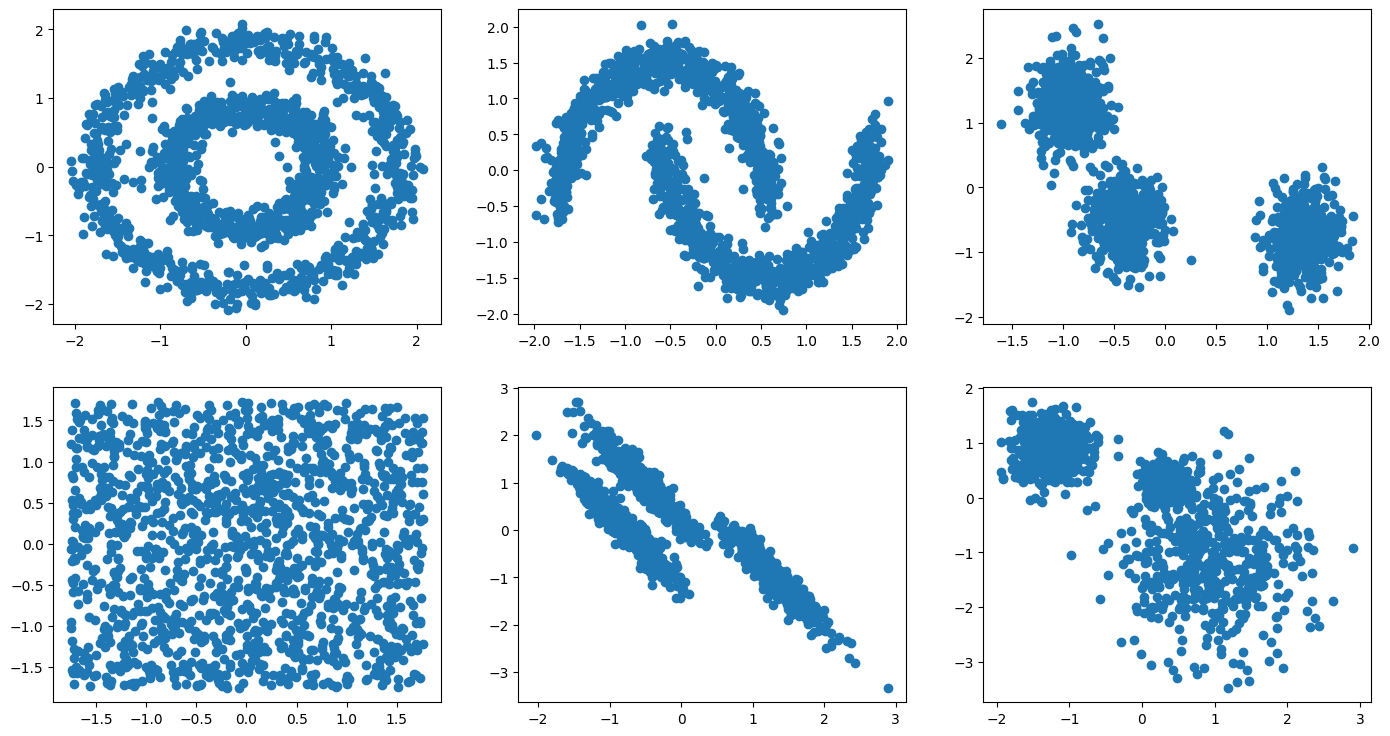

In [42]:
# dibujar los datos generados
plt.figure(figsize=(17,9))
for i in range(6):
    ax = plt.subplot(2, 3, i+1) # realizar un grafico de 2x3
    ax.scatter(X[i][:,0], X[i][:,1])

## KMEANS

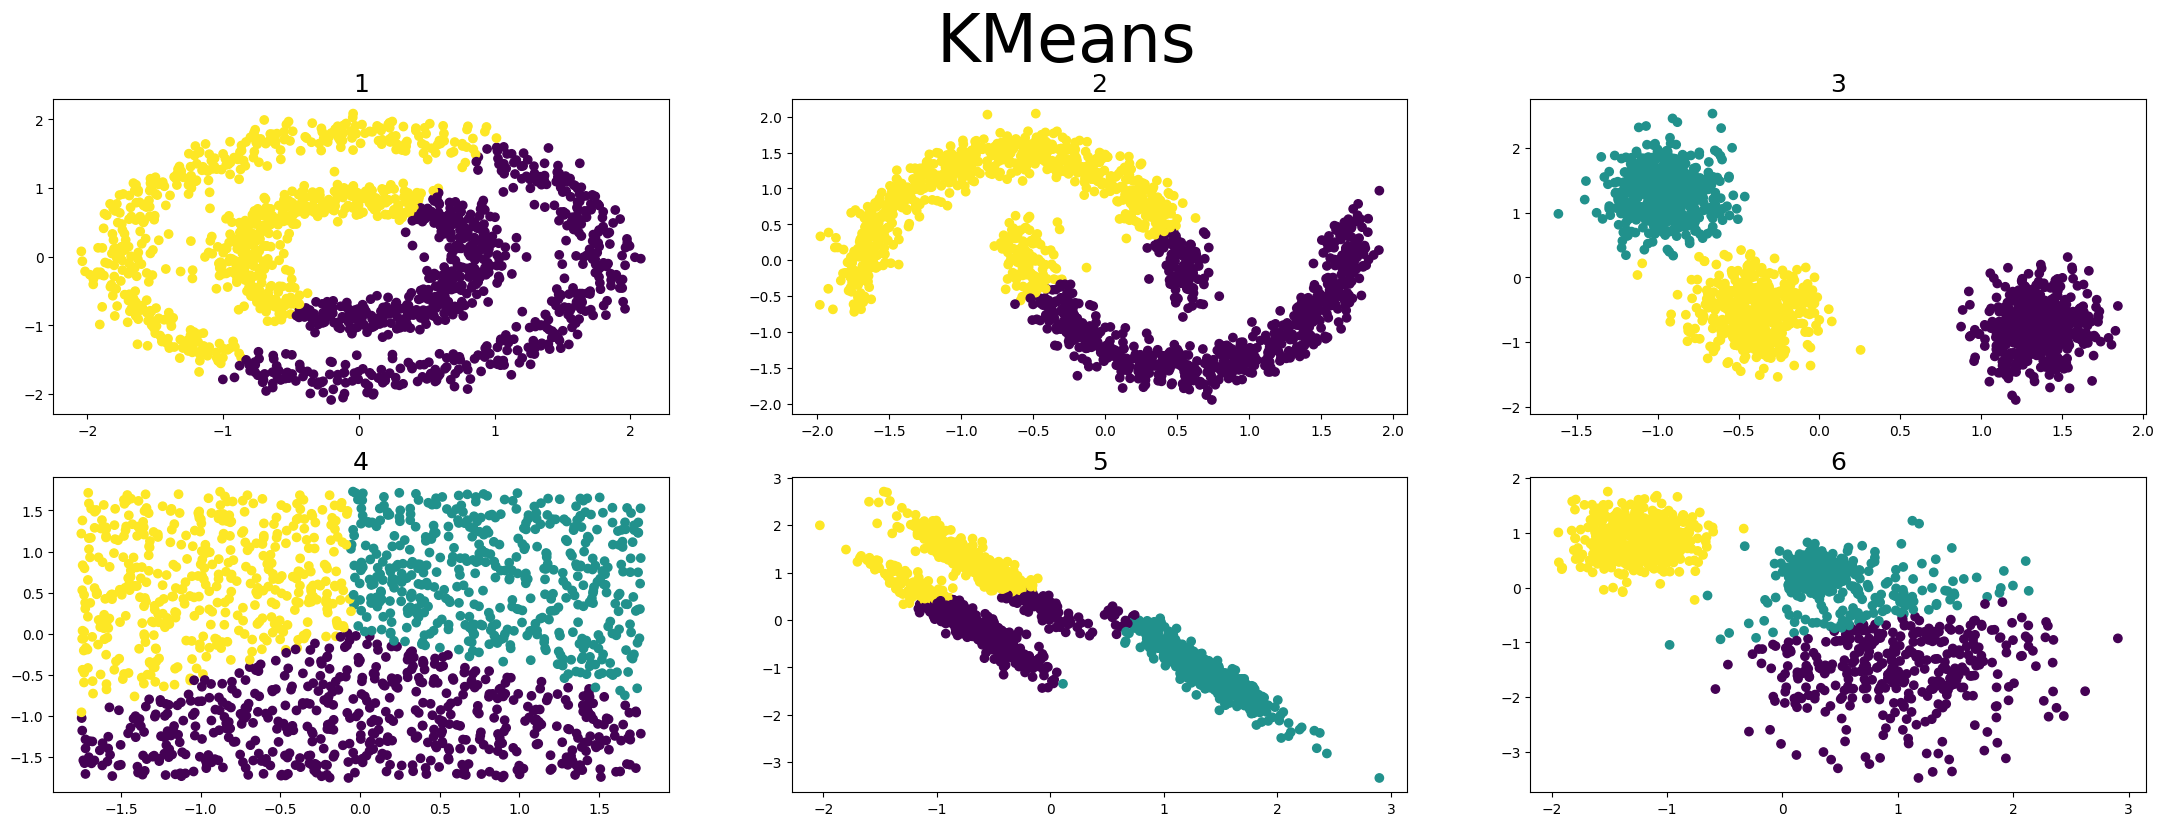

In [44]:
y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
# asignar el numero de cluster para cada conjunto de datos generados
for c, x in zip(classes, X): 
    model = cluster.KMeans(n_clusters=c, n_init=10)
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    if hasattr(model, "labels_"):
        y.append(model.labels_.astype(np.int64))
    else: # en caso el modelo no tenga tal funcion generar mediante la prediccion
        y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('KMeans', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])

* Kmeans es un algorimo de particion, basado en el algoritmo de Voronoi y triangulacion de Delaunay     
  como se observa en la 4ta gráfica.
* Kmeans NO puede resolver bien cuando los datos se encuentran distribuidos como CIRCULOS CONCENTRICOS por las anteriores razones.
* Medias lunas(superficies de decision no lineal) tampoco puede resolver bien
* Kmean No  puede resolver bien cuando los datos se encuentran muy dispersos.
* Los blobs con distribucion isotropica(5) no lo resuelve bien.
* **El 3er caso es donde Kmeans se desempeña mejor (blobs con menor dispersion).**
* Kmeans necesita que se especifique el nro de clusters.


## KMEANS++

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

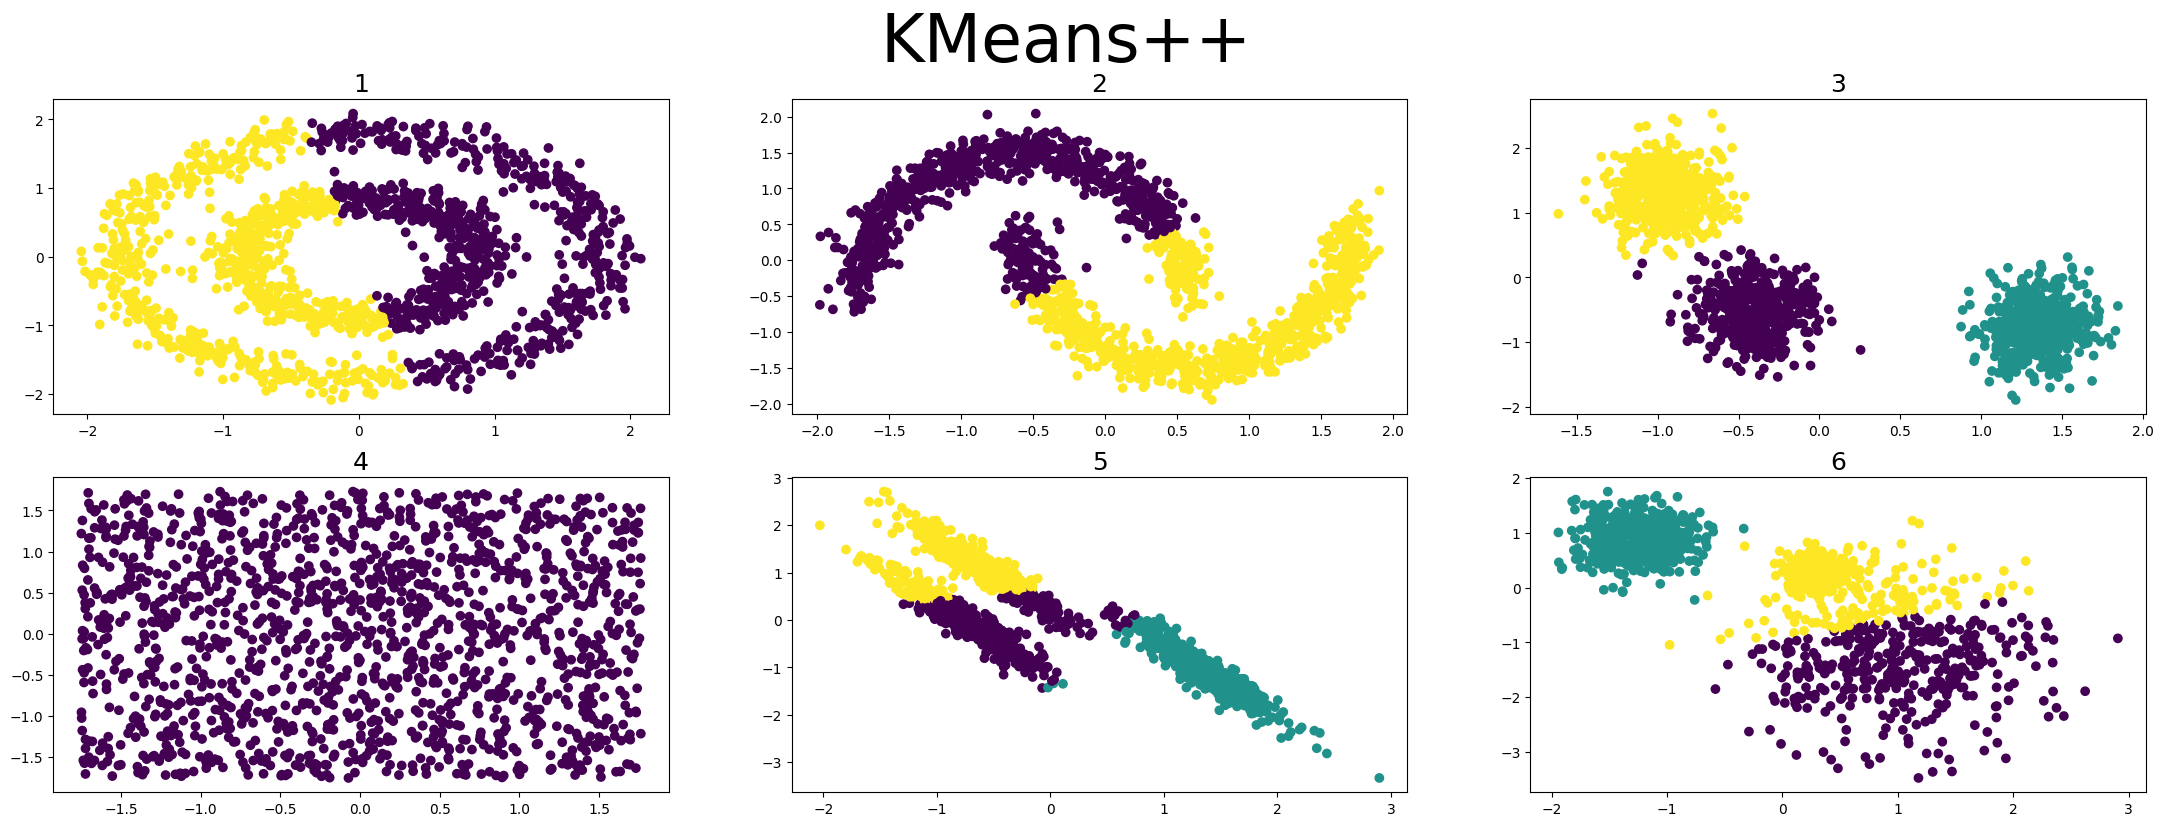

In [72]:
y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
n_clusters = [2, 2, 3, 1, 3, 3] # asignando un número de clusters para cada caso
for c, x, n in zip(classes, X, n_clusters): 
    model = cluster.KMeans(n_clusters=n, init='k-means++')
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    y.append(model.labels_)

fig = plt.figure(figsize=(27,9))
fig.suptitle('KMeans++', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])


## BIRCH

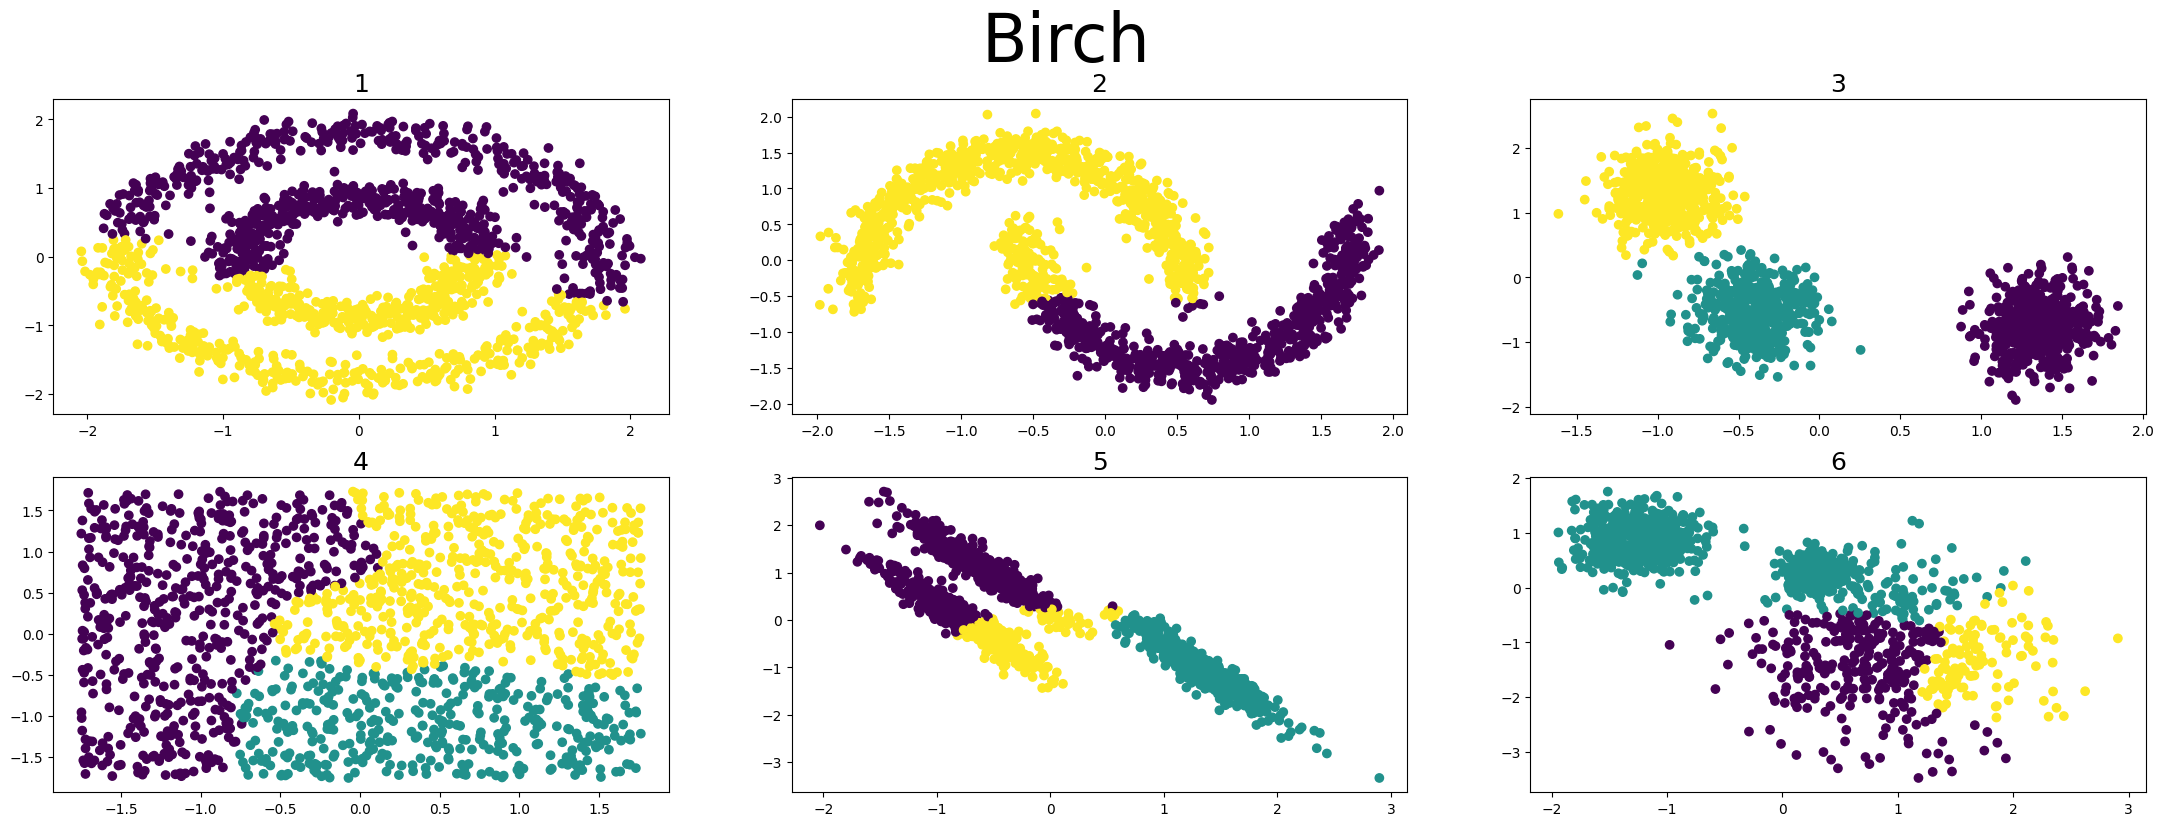

In [45]:
y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
# asignar el numero de cluster para cada conjunto de datos generados
for c, x in zip(classes, X): 
    model = cluster.Birch(n_clusters=c)
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    if hasattr(model, "labels_"):
        y.append(model.labels_.astype(np.int64))
    else: # en caso el modelo no tenga tal funcion generar mediante la prediccion
        y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('Birch', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])

* Similar al caso anterior, este tiene mejor desempeño cuando los blobs se encuentran menos dispersos como el 3er caso.
* hay casos donde Birch tiene mejor desempeño con datos dispersos.
* Se debe especificar el nro de clusters.


## SPECTRAL

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


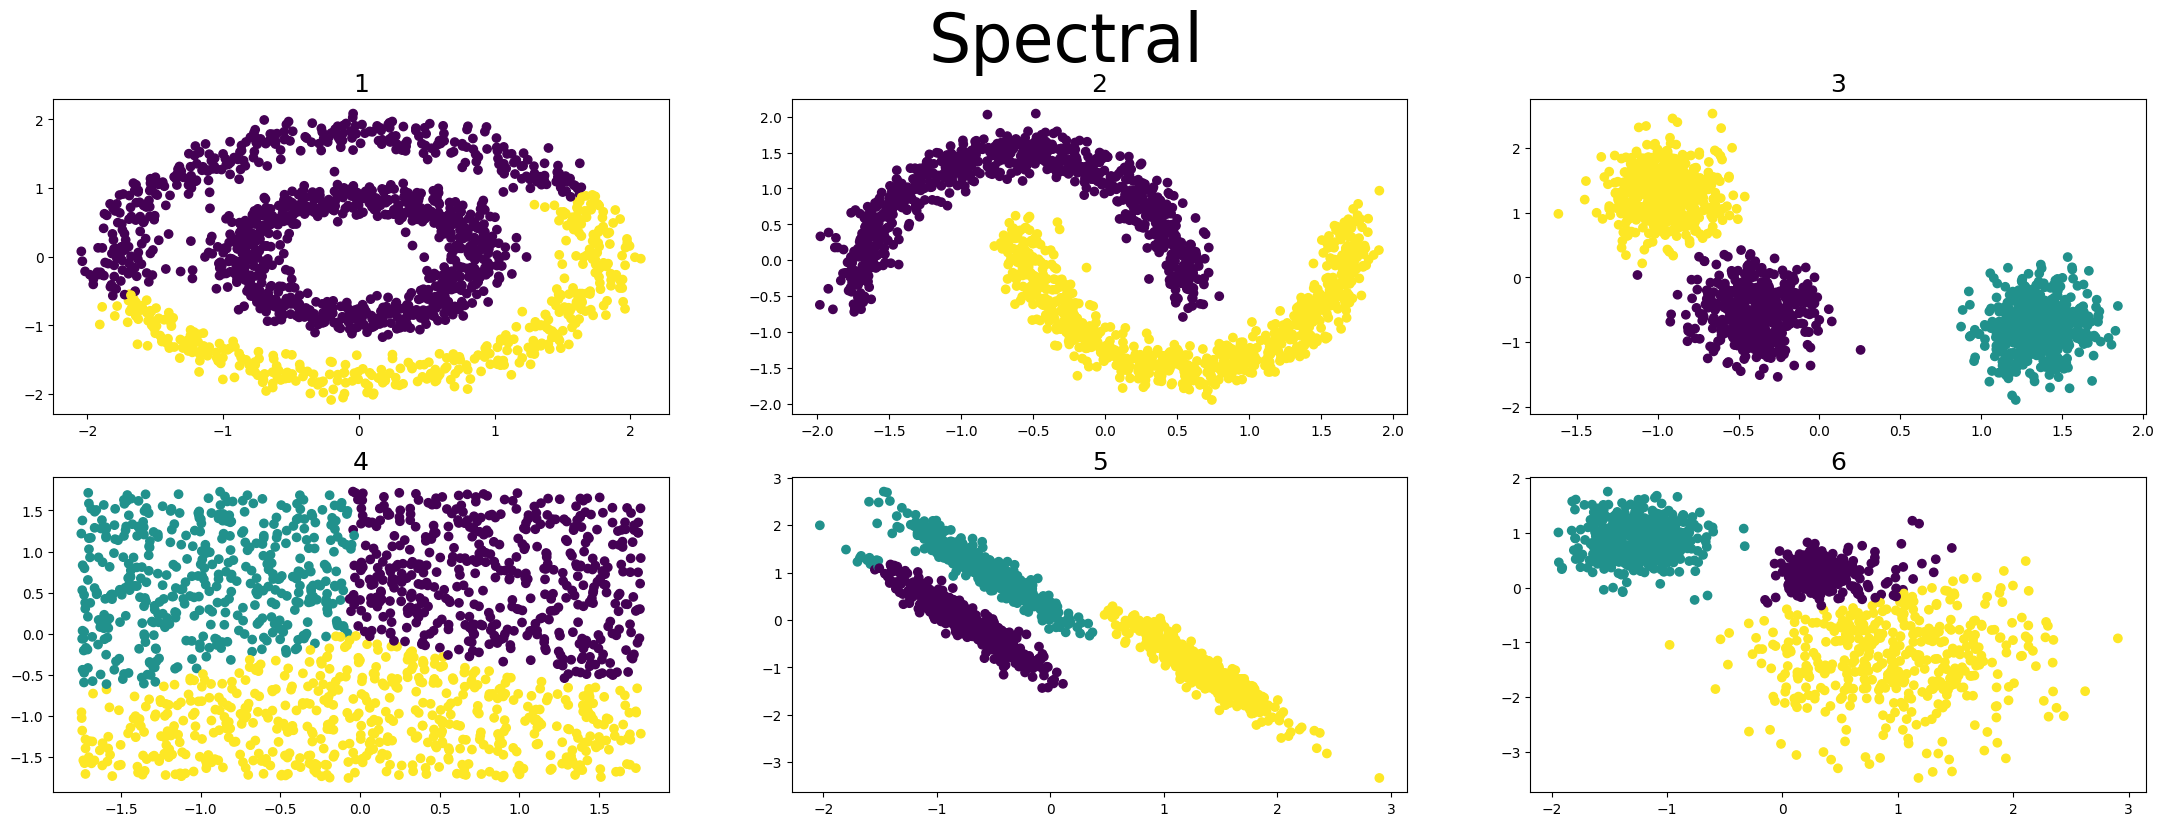

In [51]:
y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
# asignar el numero de cluster para cada conjunto de datos generados
for c, x in zip(classes, X): 
    model = cluster.SpectralClustering(n_clusters=c, affinity="nearest_neighbors",n_neighbors=9) # ,n_neighbors=10
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    if hasattr(model, "labels_"):
        y.append(model.labels_.astype(np.int64))
    else: # en caso el modelo no tenga tal funcion generar mediante la prediccion
        y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('Spectral', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])

* Se debe especificar el nro de clusters.
* Utiliza tecnicas espectrales(utiliza descomposicion de valores singulares)
* Busca las matrices de covarianzas que separan a los clusters
* En ocasiones logra separar bien los datos concentricos (dependiendo de si se encuentran más dispersos tiende a disminuir su desempeño)       
  como se observa entre el 1er y 2do caso.
* Tiene un buen desempeño con el 2,3 y 5to caso.


## MEZCLAS GAUSSIANAS (Gaussian Mixture)

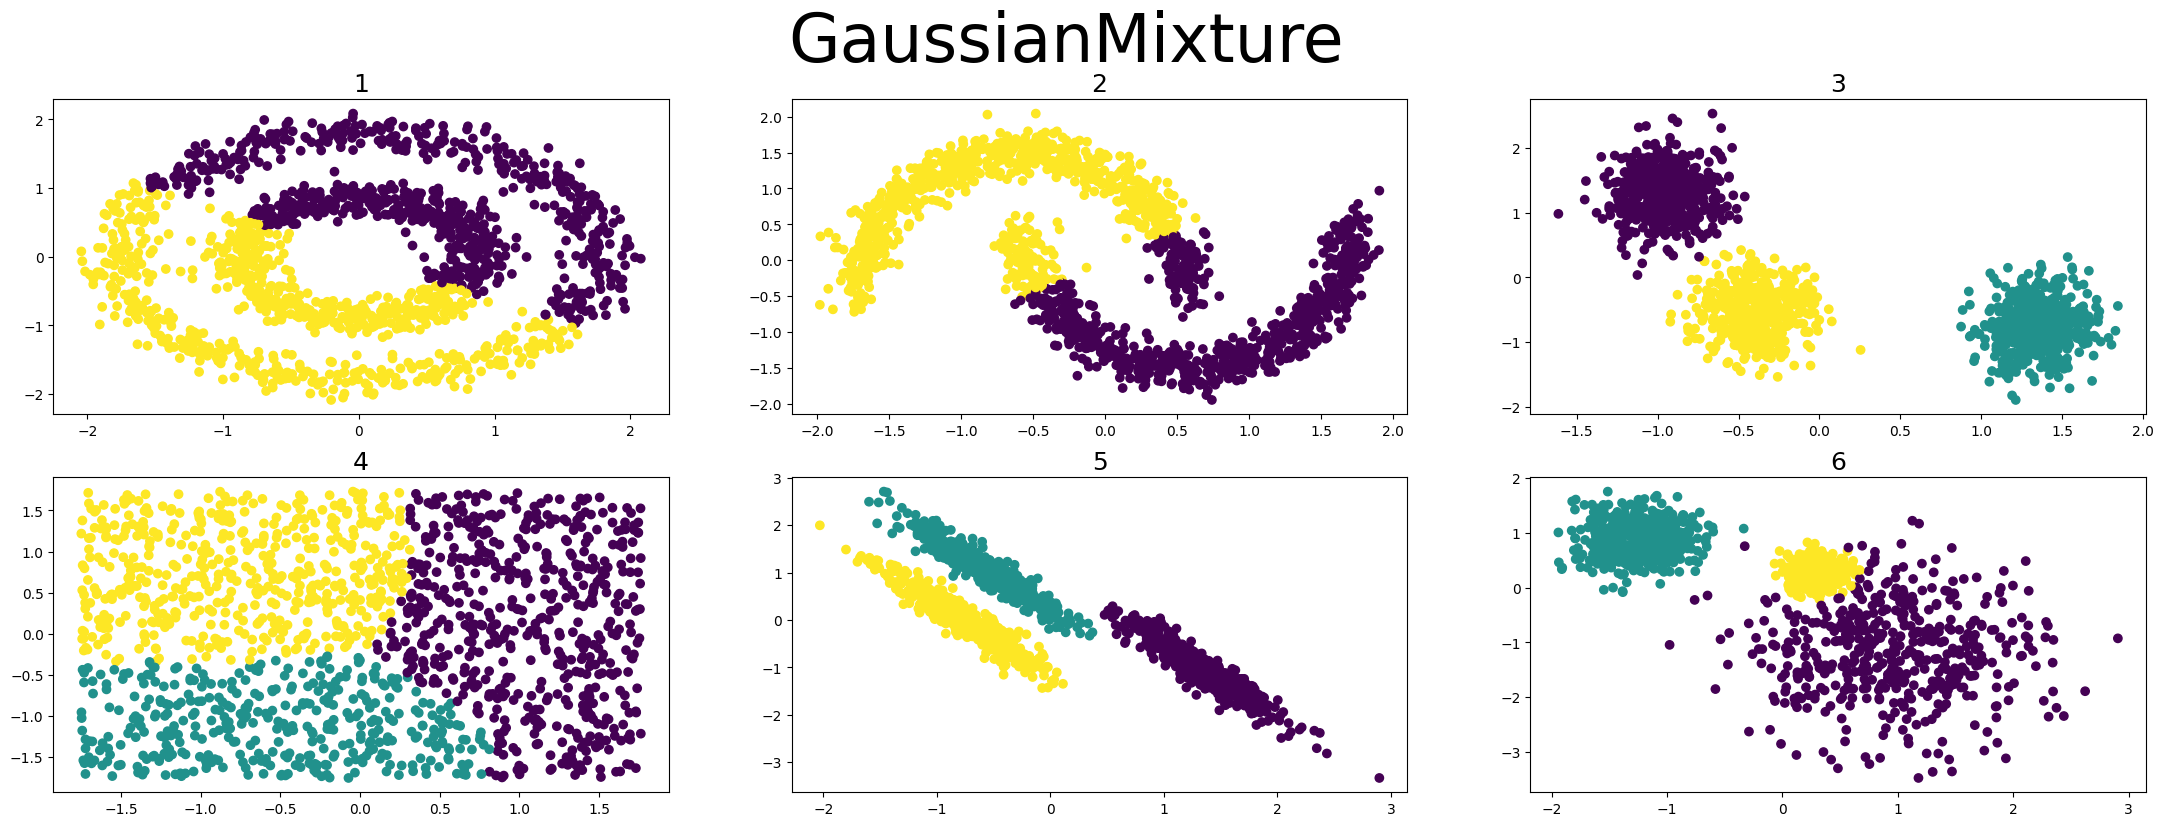

In [52]:
y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
for c, x in zip(classes, X): 
    model = mixture.GaussianMixture(n_components=c, covariance_type='full')
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    if hasattr(model, "labels_"):
        y.append(model.labels_.astype(np.int64))
    else: # en caso el modelo no tenga tal funcion generar mediante la prediccion
        y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('GaussianMixture', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])

* Mezclas gaussianas es una tecnica muy usada en procesamiento de audio, separa voces.
* Se desempeño bien en los blobs caso 3, y blobs anisotropicos(5) y tambien con el caso 6.

## OPTICS

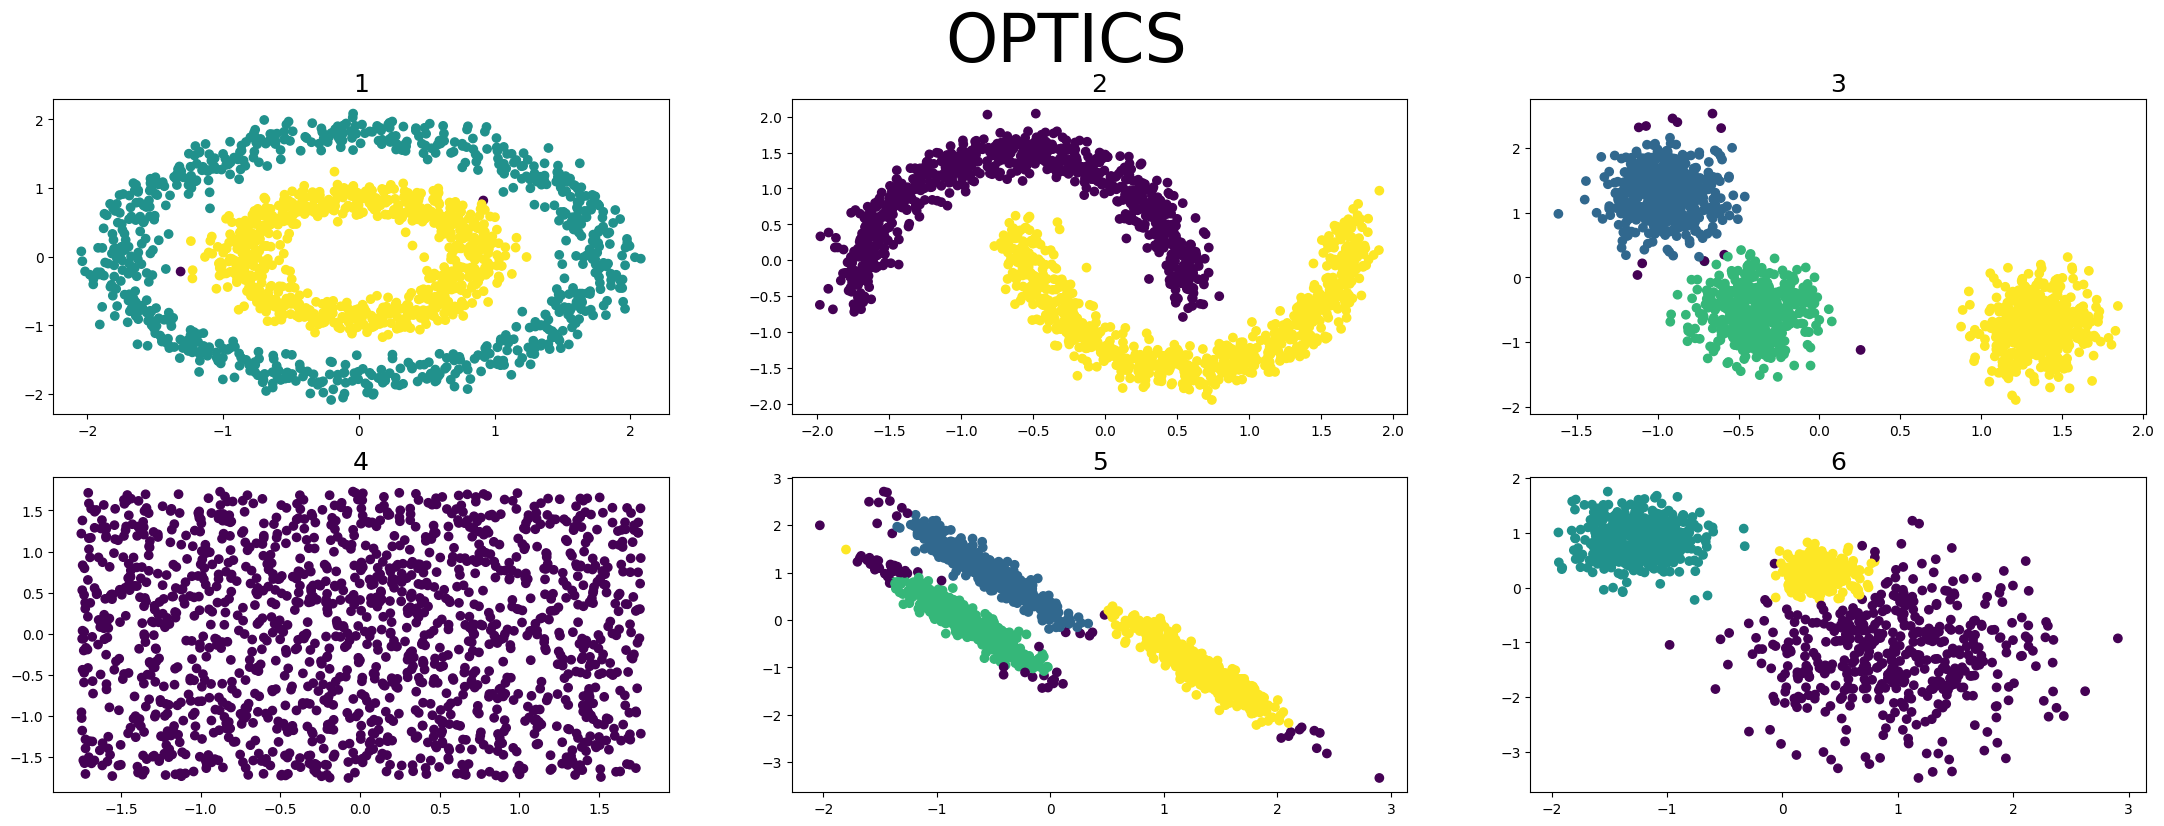

In [55]:
y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
for c, x in zip(classes, X): 
    model = cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1) # un cluster debe tener como minimo el 10% = 0.1 de los datoa
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    if hasattr(model, "labels_"):
        y.append(model.labels_.astype(np.int64))
    else: # en caso el modelo no tenga tal funcion generar mediante la prediccion
        y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('OPTICS', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])

* Esta tecnica no depende del nro de clusters.
* Basado en la probabilidad de chi2 con 0.05.
* Se observa que tiene un buen desempeño para separar los diferentes grupos.
* El modelo presenta un menor desempeño con datos anisotropicas(5).
* Es un modelo que puede ser costoso en cuanto a tiempo de ejecución.
* Se observa que hay posible presencia de datos atipicos(puntos negros).
* No se inventa clusteres para el caso 4.



## DBSCAN

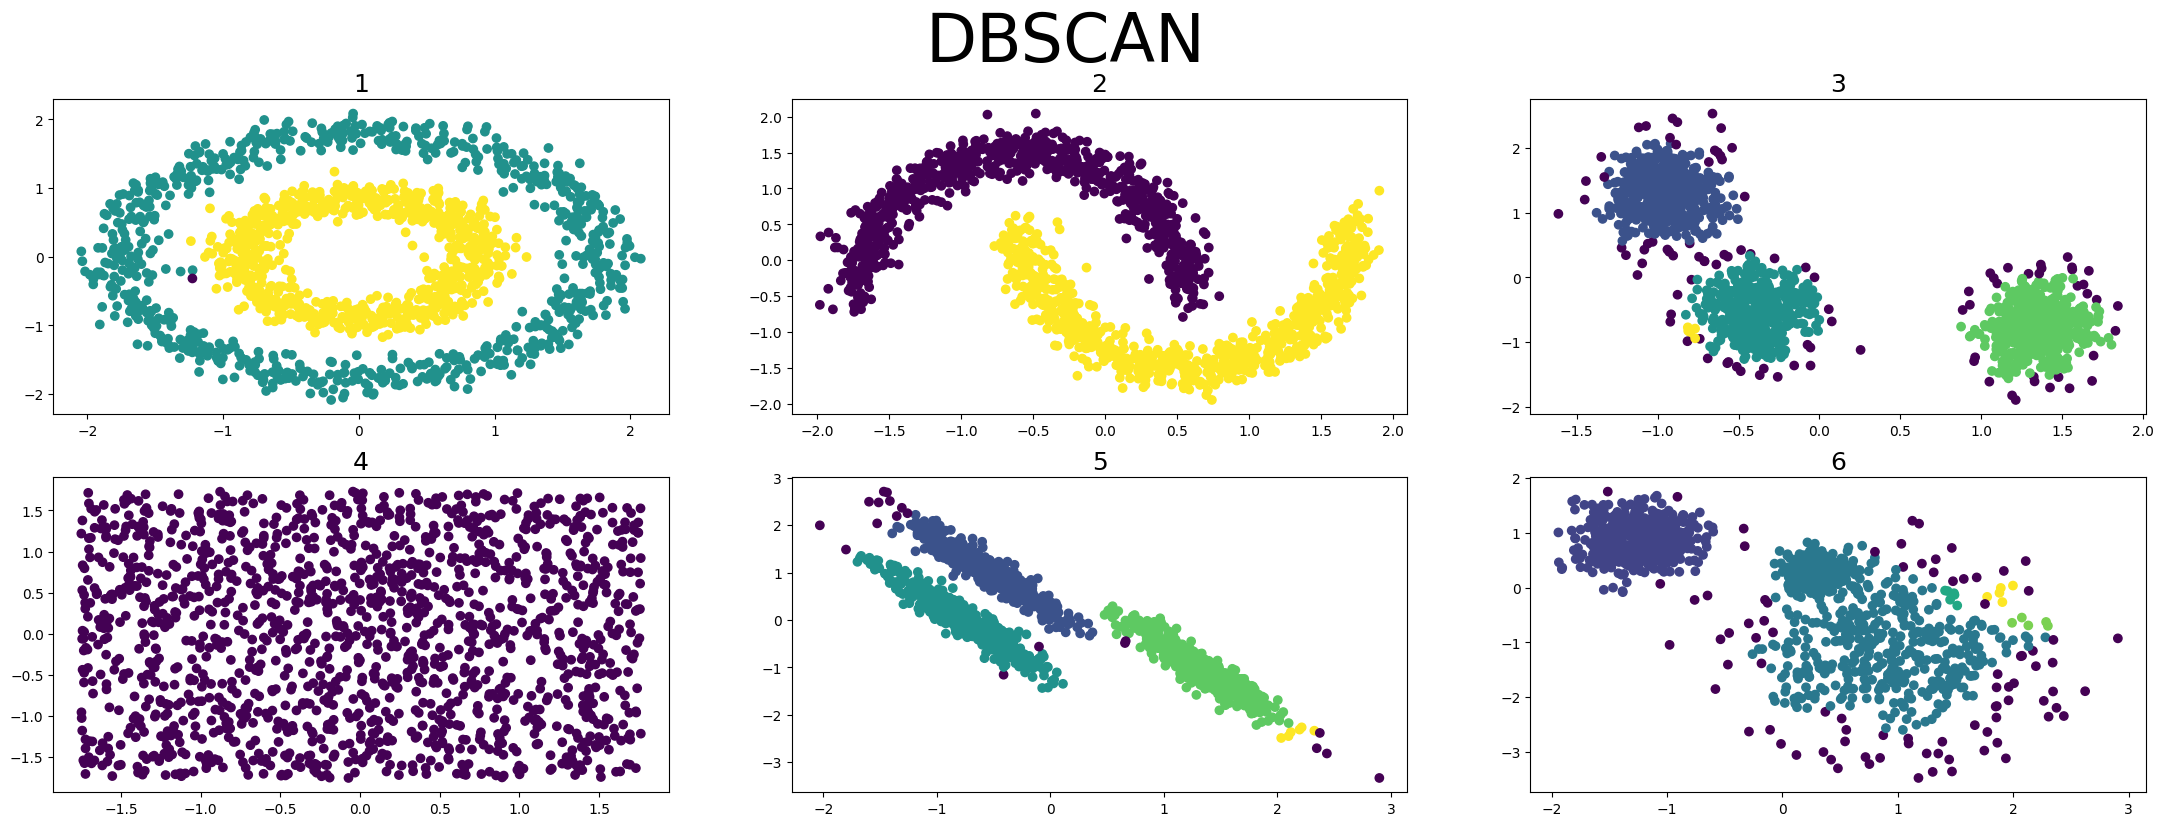

In [61]:
y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
eps = [0.2, 0.3, 0.1, 0.3, 0.15, 0.18] # asignando un eps para cada caso
for c, x, e in zip(classes, X, eps): 
    model = cluster.DBSCAN(eps=e) # un cluster debe tener como minimo el 10% = 0.1 de los datoa
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    if hasattr(model, "labels_"):
        y.append(model.labels_.astype(np.int64))
    else: # en caso el modelo no tenga tal funcion generar mediante la prediccion
        y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('DBSCAN', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])

* Es una tecnica que se basa en densidad y no en el nro de clusters.
* tiene un buen desempeño para los circulos concentricos, medias lunas y blobs.
* No se inventa clusteres para el caso 4.
* Tiene un menor desempeño cuando clusters con datos muy dispersos o diferentes dispersiones.
* Permite identificar posibles outliers(puntos de color negro).



## HDBSCAN

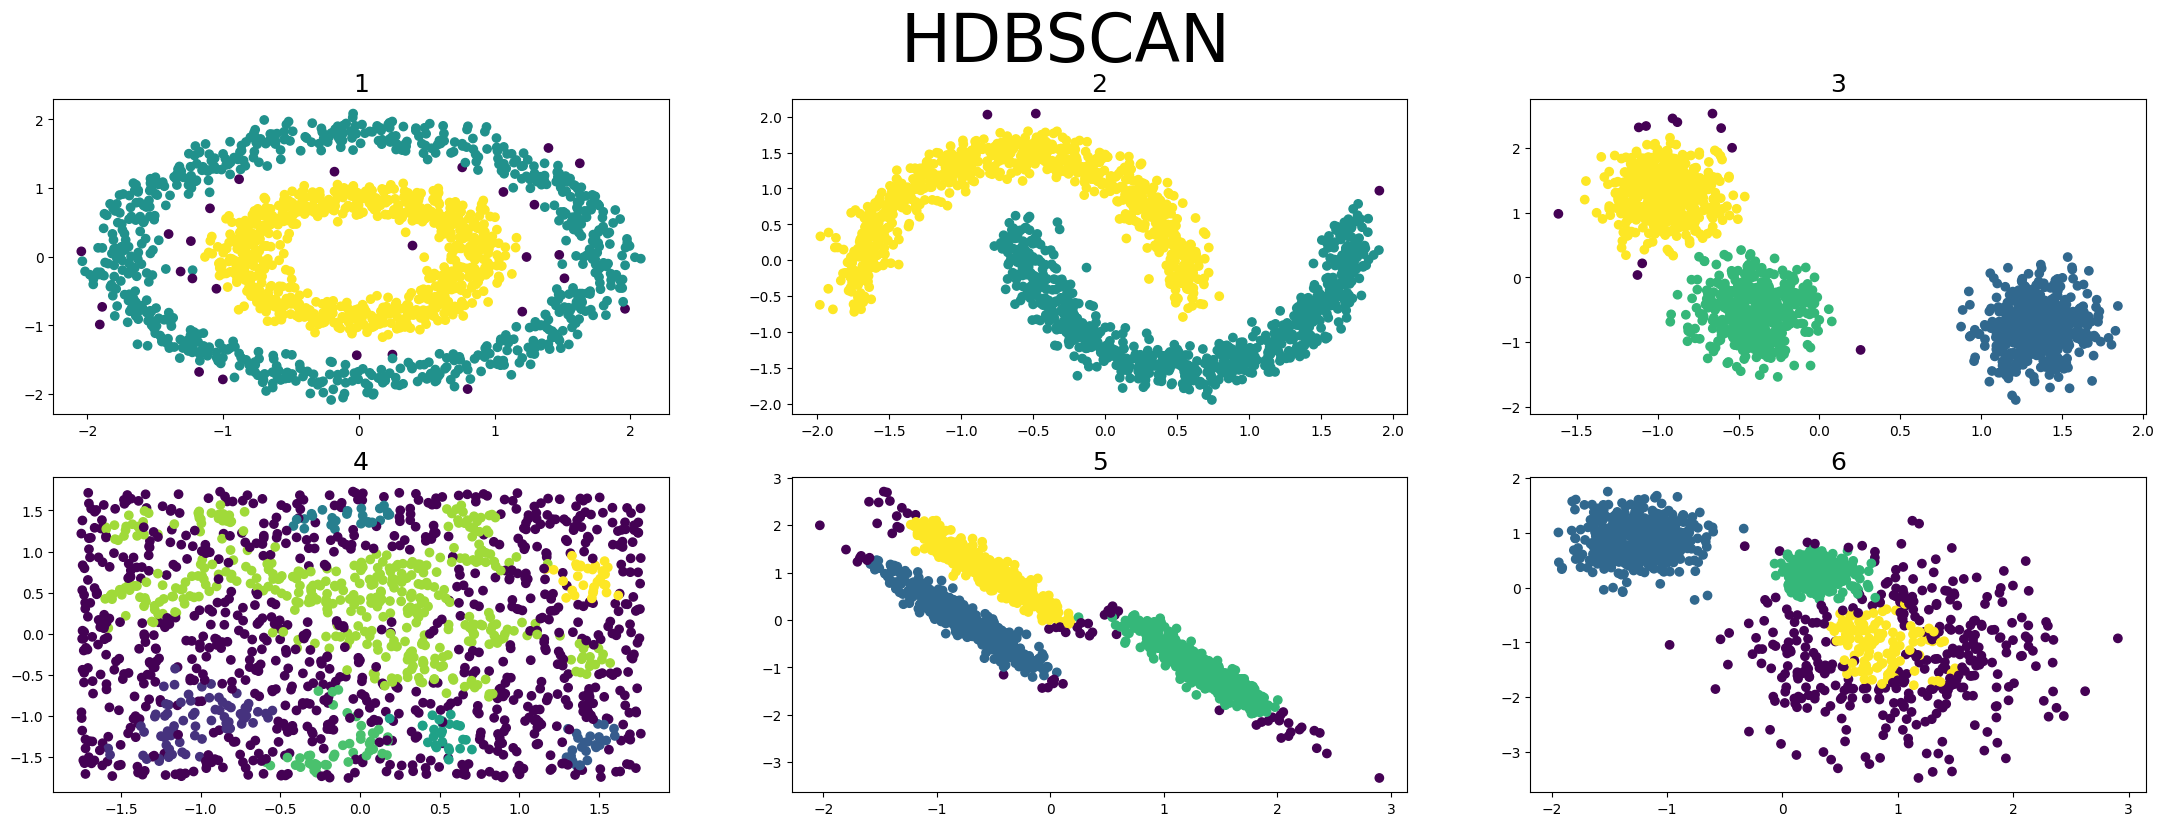

In [67]:
import hdbscan

y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
min_cluster_sizes = [5, 10, 15, 20, 25, 30] 
for c, x, mcs in zip(classes, X, min_cluster_sizes): 
    model = hdbscan.HDBSCAN(min_cluster_size=mcs)
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    y.append(model.labels_)

fig = plt.figure(figsize=(27,9))
fig.suptitle('HDBSCAN', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])

* Se observa que el modelo tiene un buen desempeño con los casos 1,2,3 y 5.
* Dependiendo de lo que se busca estudiar tambien podria tener o no un buen desempeño para el caso 6.
* dificulta con el caso 4.

## AgglomerativeClustering

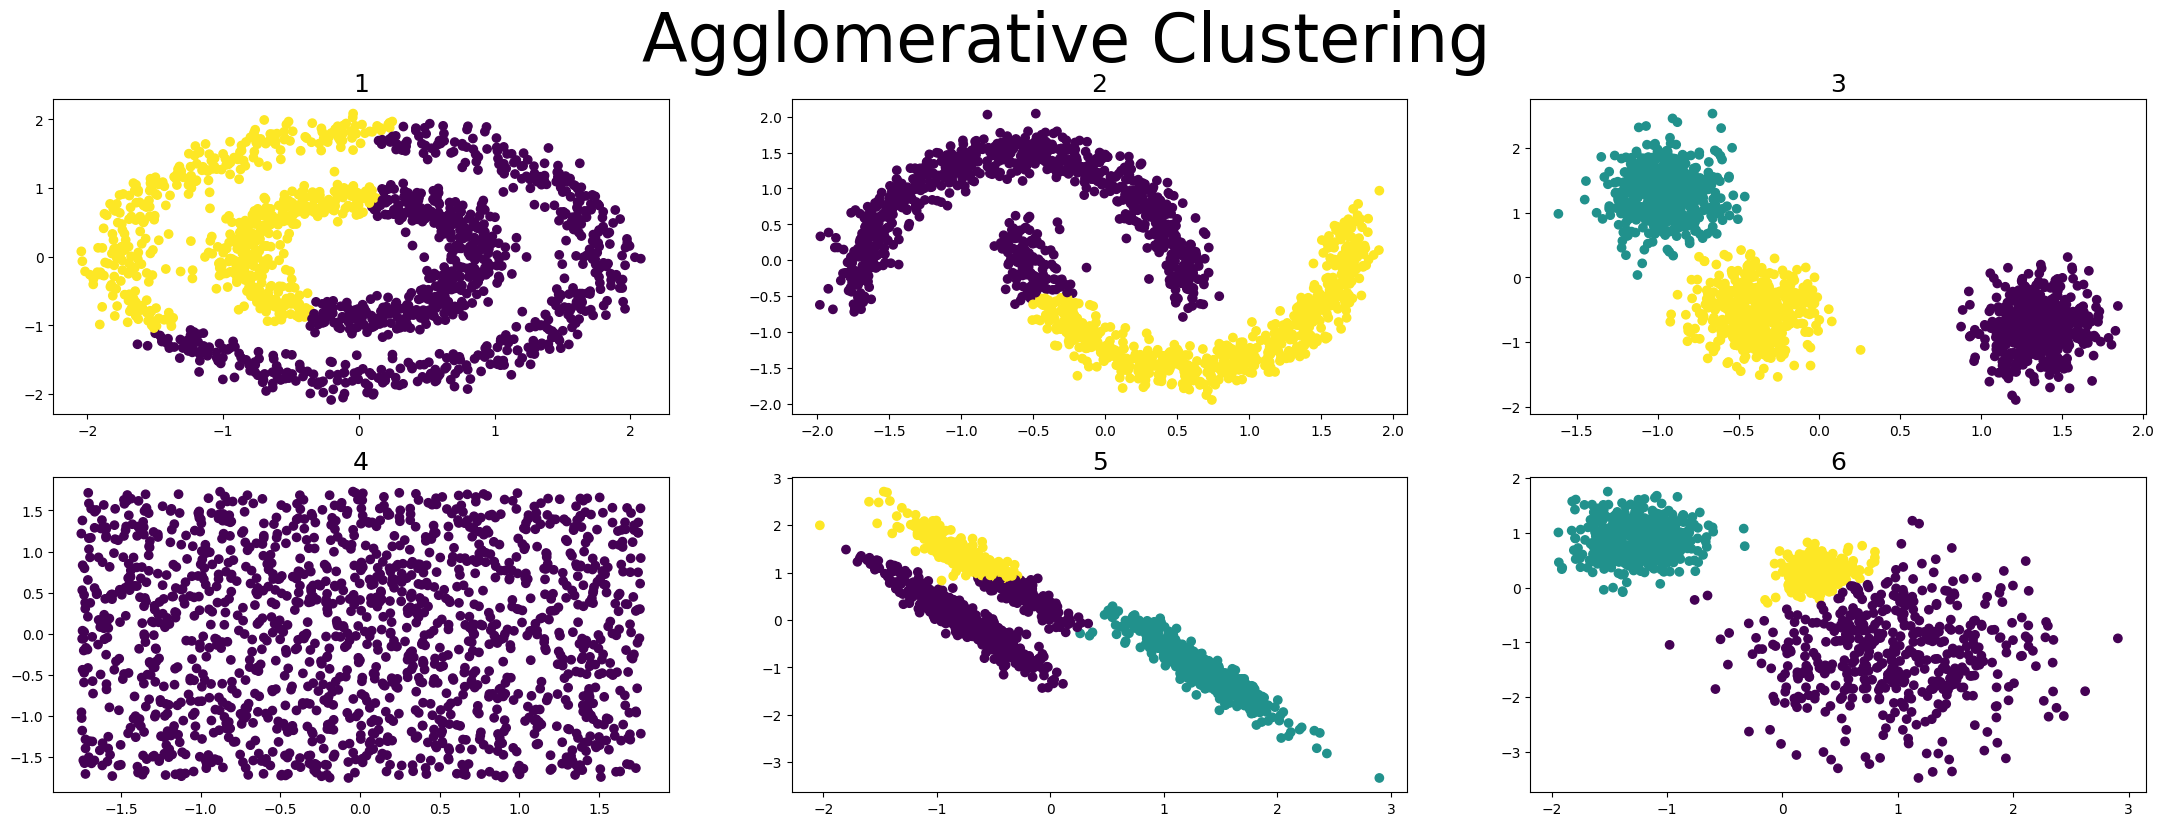

In [ ]:
from sklearn.cluster import AgglomerativeClustering

y = [] # almacenas las clases o labels que el modelo asignó a cada dato, para cada conjunto de datos
n_clusters = [2, 2, 3, 1, 3, 3] # asignando un número de clusters para cada caso
for c, x, n in zip(classes, X, n_clusters): 
    model = AgglomerativeClustering(n_clusters=n)
    model.fit(x)
    # extraer los labels de los clusters asignados a cada dato 
    if hasattr(model, "labels_"):
        y.append(model.labels_.astype(np.int64))
    else: # en caso el modelo no tenga tal función generar mediante la predicción
        y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('Agglomerative Clustering', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(f"{i+1}", fontsize=18)
    ax.scatter(X[i][:,0],X[i][:,1], c=y[i])


* Se observa que el algoritmo de aglomeracion tiene un buen desempeño con los casos 3 y 4 y 6.

## Conclusiones

* Los algoritmos más populares son KMEANS, DBSCAN y OPTICS.
* Se observó que cada algoritmo tiene sus pros y contras, por lo que dependerá de las necesidades para hacer uso de alguno de ellos.